# CMSC 25440: HW 1
Brendan Sanderson

## Downloading and exploring the dataset [25 points]

In [0]:
from statistics import mean, stdev, median
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv(
    "/content/drive/My Drive/MLiM-Datasets/HW1/data/P1_data.csv",
    dtype=float,
    keep_default_na=False,
    na_values=[])
data = df.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


### Question 1: What are the mean, median and standard deviations for each of the columns in the data? [10 points]

In [0]:
df.describe().loc[['mean','std', '50%']]

,HNF4A|3172,ANKS4B|257629,RPS4Y1|6192,TCF21|6943,HOXA13|3209,FOXA2|3170,NKX2-1|7080,UGT2A3|79799,AMN|81693,TINAG|27283
mean,3.664857,2.835294,3.593260,3.516763,1.874850,2.809064,2.740198,2.889912,4.378659,2.593255
std,4.219783,3.522951,5.032564,3.069820,1.807420,3.673540,4.763950,4.774149,3.907661,3.887850
50%,1.154454,0.634406,0.198847,2.545313,1.439448,0.654713,0.000000,0.000000,2.841477,0.000000


Note that 50% is the median.

#### Do we see any outliers in the data with respect to the genes that we have considered?

TCF21|6943 and AMN|81693 seem like outliers due to their very high median. They are both above 2.5 and no other gene has above a 1.5 median. HOXA13|3209 could also be considered an outlier due to having a higher median combined with an extremely low standard deviation.

### Question 2: Visualize the distribution from your data frame [10 points]

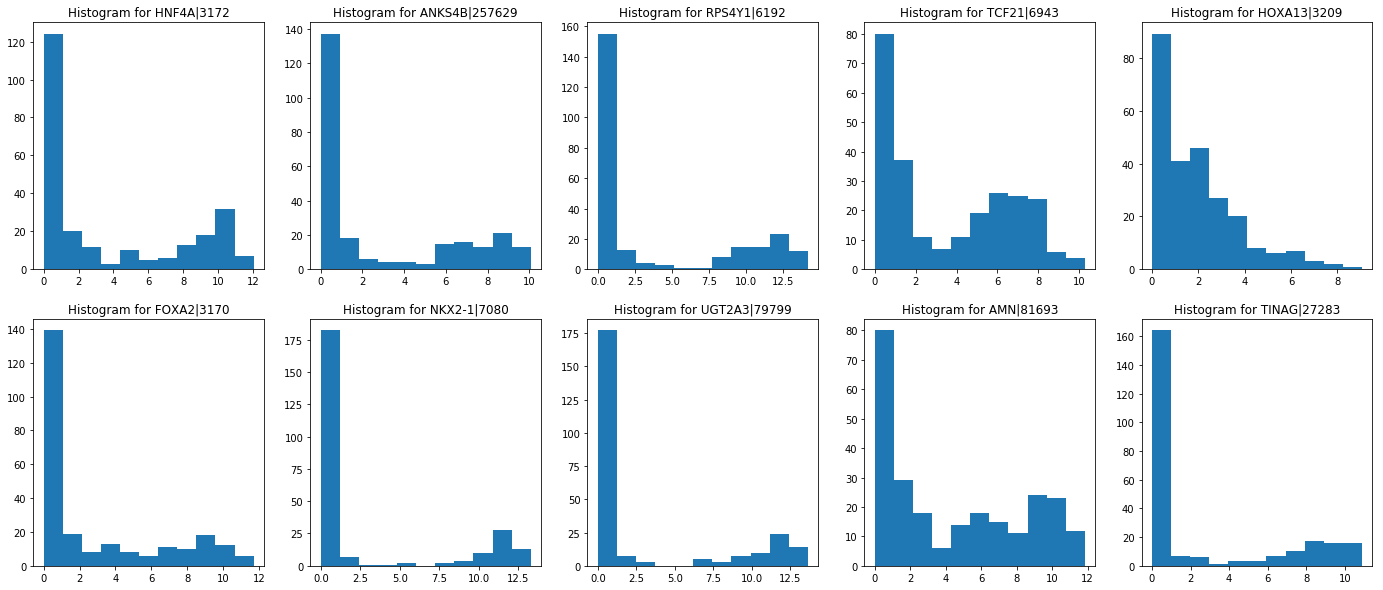

In [0]:
plt.figure(figsize=(24, 10))
for i,c in enumerate(df.columns):
  plt.subplot(2, 5, i+1) 
  plt.hist(df[c], bins=11) 
  plt.title("Histogram for " + str(c))
plt.show()

#### From the histogram, can you reason about the distribution of the dataset itself? How many of the genes have outliers?
It appears the general distribution is a majority of the patients with a quantity of 0-1 and then another significant portion of the patients with a quanity of somewhere between 6-13. TCF21|6943 and AMN|81693 seem to be outliers as there is a much larger proportion of patients that have a significant quantity of the gene and the range of significant quantities is much wider. Also, HOXA13|3209 is an outlier as the distribution does not match the others. It has a significant portion at 0 and then the number of patients decreases as quantity of the gene increases.

### Question 3: Visualizing the entire dataset as a contour map [5 points]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Contour map for data frame')

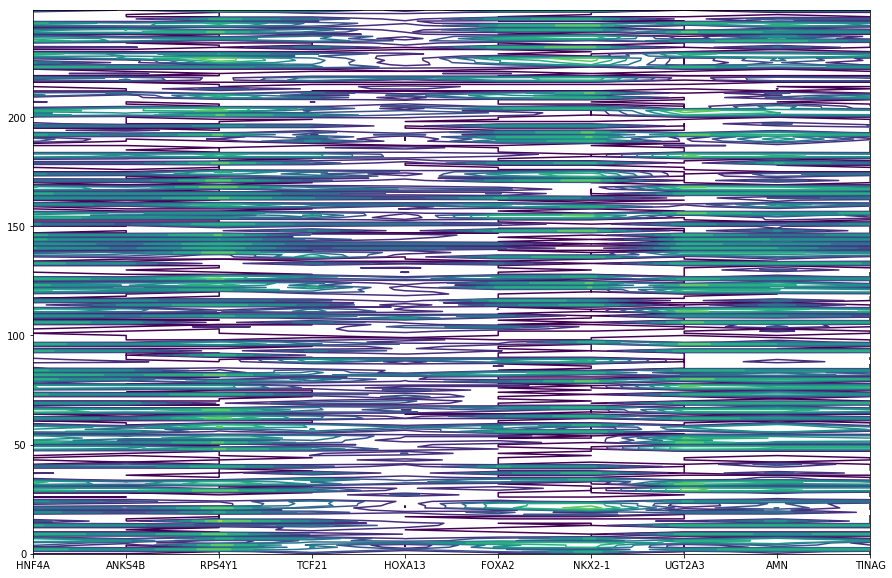

In [0]:
plt.figure(figsize=(15,10))
plt.xticks(list(range(10)), [c.split("|",1)[0]  for c in df.columns])
plt.contour(list(range(len(df.columns))),list(range(250)),df.as_matrix())
ax.set_title('Contour map for data frame')

## Simple clustering of the dataset [25 points]

### Question 4: Selecting an initial choice of k [5 points]

Horizontally, the contour map shows the gene profile for each of the patients. The number of phenotypes is likely equal to the number of distinct gene profiles. It is to determine any sort of result from this as there is a lot of data in the map. However, my best guess would be that there are 3 distinct phenotypes. The first one is where no genes are really apparent. The second is that they contain genes on the far right and towards the left. The third is where they contain genes around NKX2-1 and some on the far left. For this reason, I would hypothesize that there are 3 phenotypes. However, it is hard to tell if there may more phenotypes.

Beceause the contour plot gives us some idea of the number of phenotypes, but because it is not quite conclusive. I am going to run k means with 3 to 10 clusters and look at the results to hypothesize how many phenotypes there are.

### Question 5: Setting up and running k-means clustering [20 points]

First, I run k-means with a varied amount of k from 3-10. I then create several graphs for each run of k-means in order to attempt to determine the best k. The first plot displays the mean of each cluster using a scatter plot. The second plot is the data colored by the cluster it is in and the third plot is a histogram displaying the quantity of patients in each cluster.

In [0]:
all_centers = []
all_labels = []
for i in range(3,11):
  kmeans = KMeans(n_clusters = i, n_jobs = -1)
  kmeans.fit(df)
  ls = kmeans.predict(df)
  all_labels.append(ls)
  all_centers.append([sum(df.as_matrix()[ls == j])/df.as_matrix()[ls==j].shape[0] for j in range(i)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_lau

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


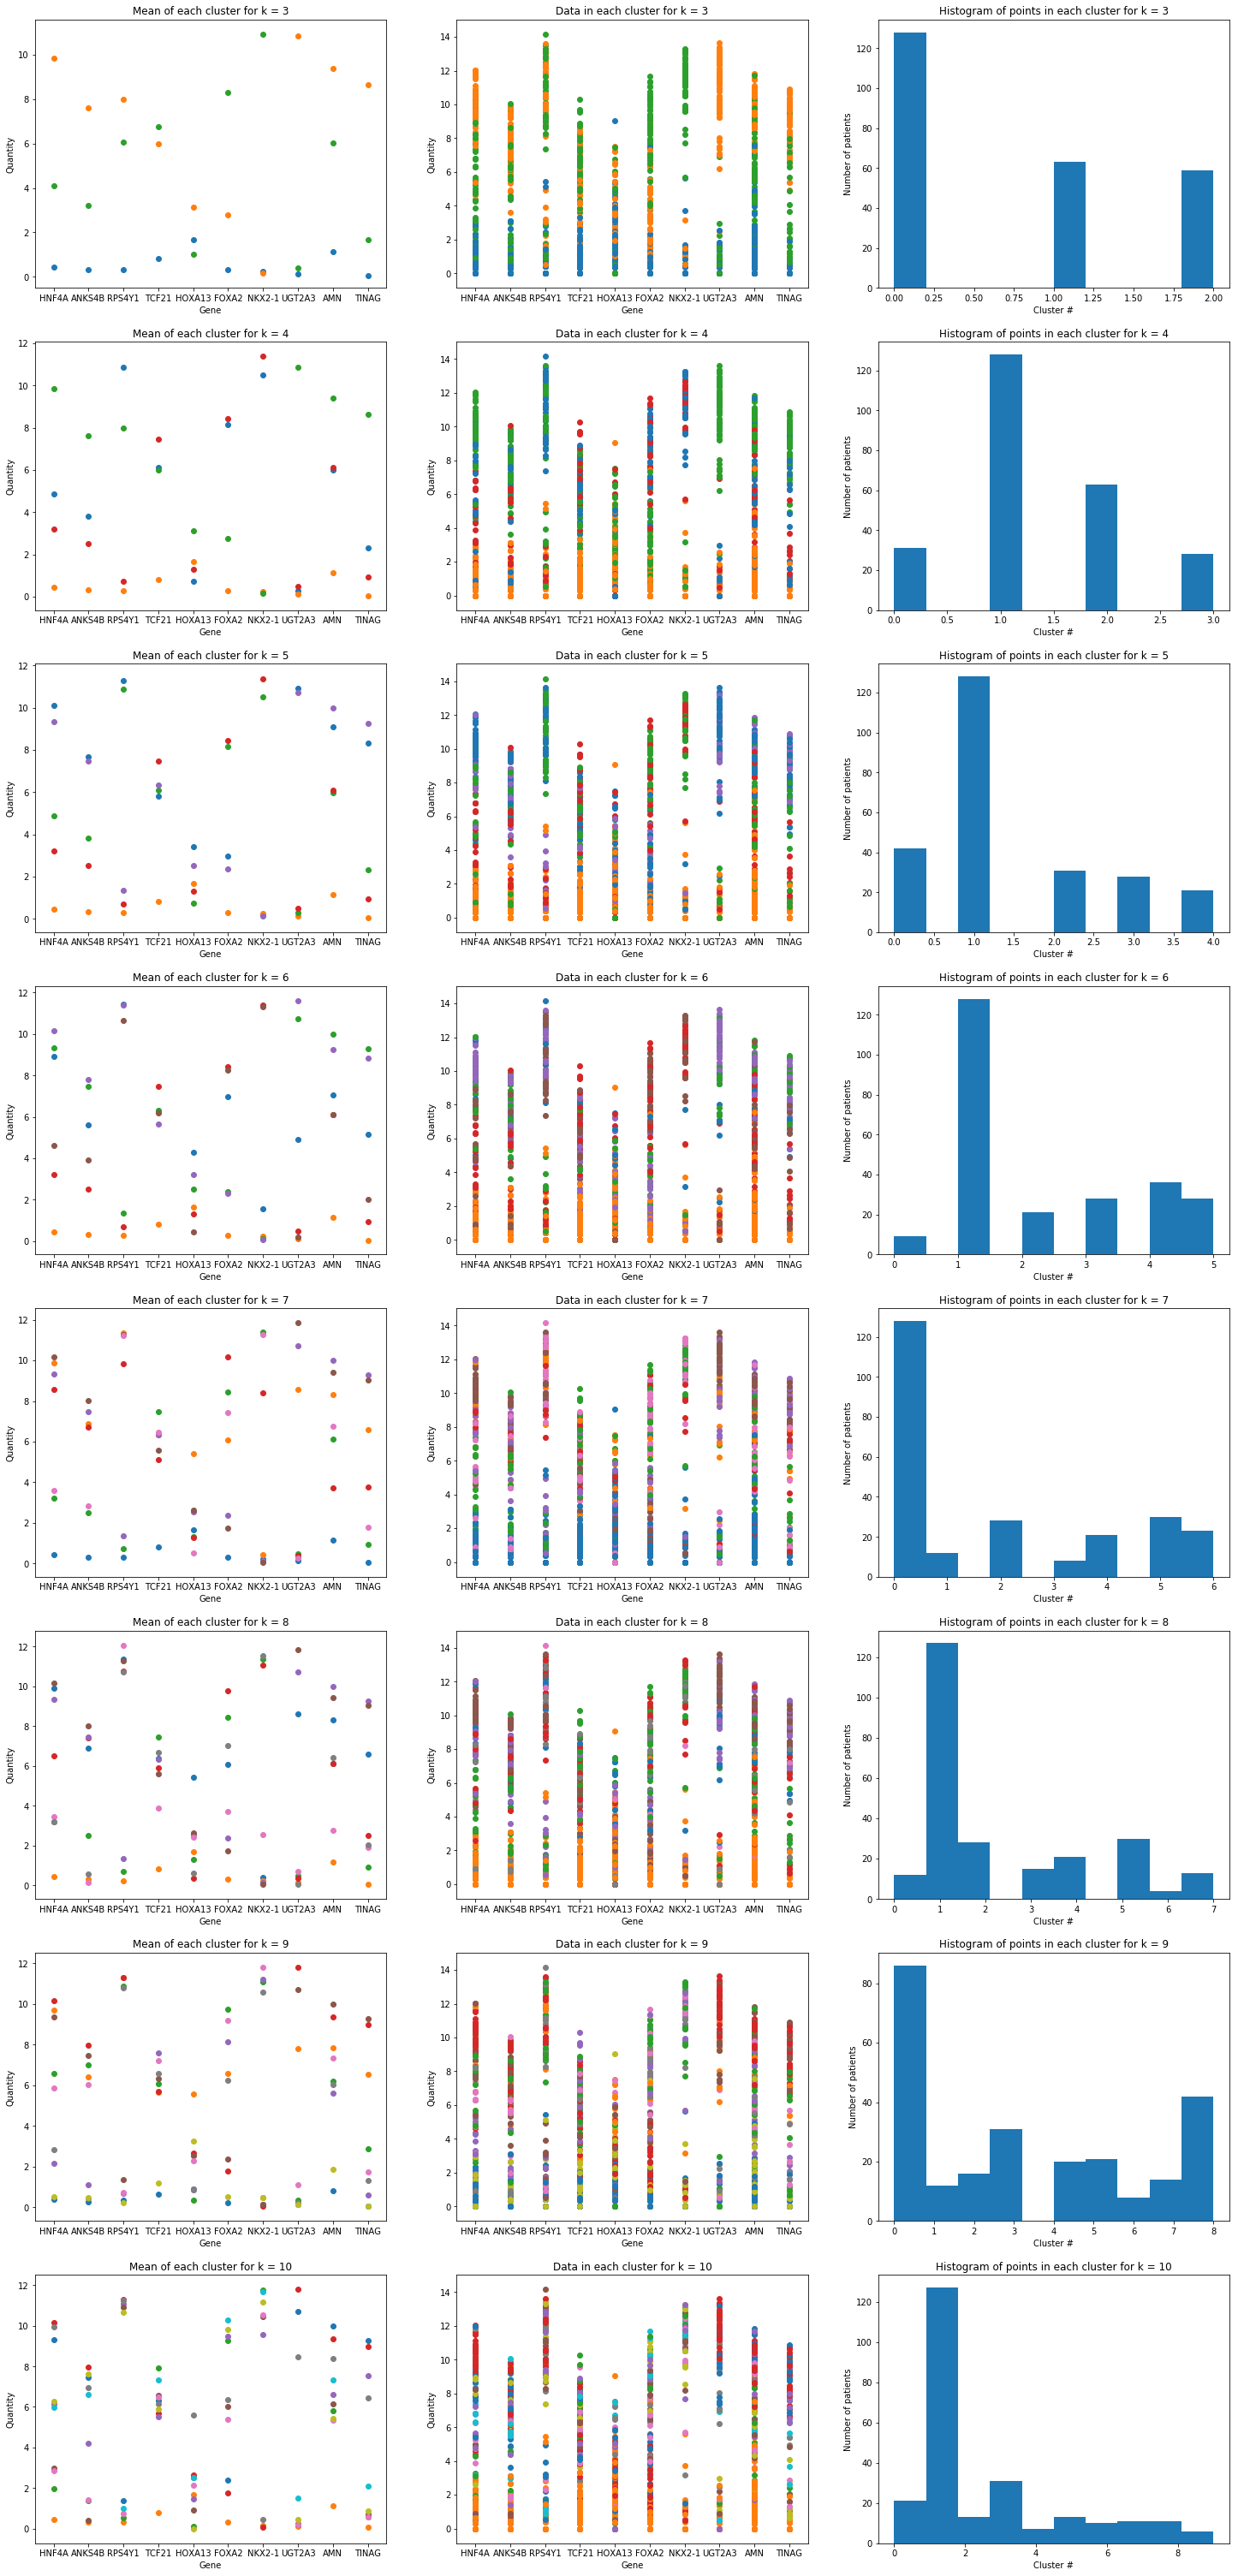

In [0]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(25,75))
for i, j in enumerate(list(range(3,11))):
  plt.subplot(11, 3, i*3+1) 
  for l in range(j):
    plt.scatter(list(range(10)), all_centers[i][l])
  plt.xticks(list(range(10)), [c.split("|",1)[0]  for c in df.columns])
  plt.xlabel("Gene")
  plt.ylabel("Quantity")
  plt.title("Mean of each cluster for k = " + str(j))
  plt.subplot(11, 3, i*3+2) 
  plt.title("Data in each cluster for k = " + str(j))
  plt.xlabel("Gene")
  plt.ylabel("Quantity")
  plt.xticks(list(range(10)), [c.split("|",1)[0]  for c in df.columns])
  for l, col in enumerate(df.as_matrix()):
    plt.scatter(list(range(10)), col, c=colors[all_labels[i][l]])
  plt.subplot(11, 3, i*3+3) 
  plt.title("Histogram of points in each cluster for k = " + str(j))
  plt.hist(all_labels[i])
  plt.xlabel("Cluster #")
  plt.ylabel("Number of patients")
plt.show()

#### Description of a rationale for how you decided to use k. Note that as we continue with the class, we will find more quantitative ways to decide on k (which is referred to as model selection).

From looking at the graphs above, I predict that there are 3 phenotypes. This is for several reasons. 

First off, when looking at the histogram for 3 clusters, you can see that one cluster had above 120 and the other two had about 60. When looking at the histogram for 4 clusters, There is one cluster with above 120 as before, there is one cluster with about 60 and two clusters with about 30. I would imagine that if there was a 4th independent cluster, then it would take patients from all of the other clusters, but in this case it appears that one cluster just split into two. Thus, they should really just be 1 cluster instead of 2. When we look at the results for 5 clusters, the other cluster with 60 appears to split.

Next, when looking at the center graphs for all of the data, it appears that the cluster that was green for k = 3 has been split into the blue and red cluster for k = 4. For this reason, it appears that there are truly only 3 clusters, but by trying to find a 4th, we end up splitting one in half, which means that they should be just 1 cluster.

Finally, when looking at the mean graph it appears that there is a lot more overlap between the means of the clusters for k = 4 than for k = 3. The mean of the red and the blue clusters seem to be very close together for almost all of the genes, which implies that they should just be one cluster.

#### Describe the number of phenotypes (i.e., k) that you discovered with the k-means algorithm.

Based on this analysis and my hypothesis, I predict that there are 3 phenotypes.

Below, I will desplay the data for the different phenotypes.

,HNF4A|3172,ANKS4B|257629,RPS4Y1|6192,TCF21|6943,HOXA13|3209,FOXA2|3170,NKX2-1|7080,UGT2A3|79799,AMN|81693,TINAG|27283
Cluster 1,0.433199,0.313874,0.301548,0.812660,1.663699,0.301984,0.241376,0.128085,1.144430,0.048499
Cluster 2,9.841129,7.615438,7.984515,5.981297,3.127877,2.772955,0.151618,10.850646,9.390383,8.644577
Cluster 3,4.080908,3.201273,6.045633,6.751669,0.994965,8.286708,10.925450,0.381226,6.043790,1.652503


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


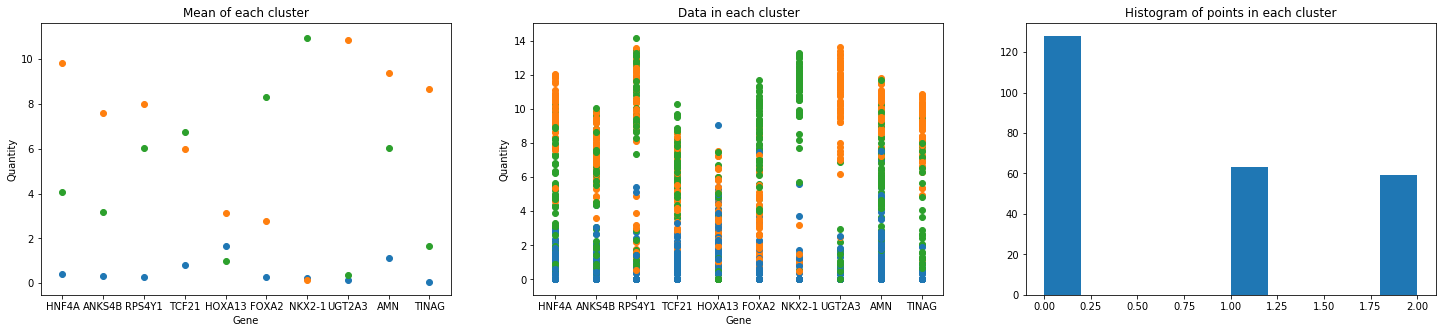

In [0]:
cdf = pd.DataFrame(all_centers[0], columns = list(df.columns), index=["Cluster 1", "Cluster 2", "Cluster 3" ])

display(cdf)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(25,5))
plt.subplot(1, 3, 1) 
for i in range(k):
  plt.scatter(list(range(10)), centers[i])
plt.xticks(list(range(10)), [c.split("|",1)[0]  for c in df.columns])
plt.xlabel("Gene")
plt.ylabel("Quantity")
plt.title("Mean of each cluster")
plt.subplot(1, 3, 2) 
plt.title("Data in each cluster")
plt.xlabel("Gene")
plt.ylabel("Quantity")
plt.xticks(list(range(10)), [c.split("|",1)[0]  for c in df.columns])
for i, col in enumerate(df.as_matrix()):
  plt.scatter(list(range(10)), col, c=colors[labels[i]])
plt.subplot(1, 3, 3) 
plt.title("Histogram of points in each cluster")
plt.hist(labels)
plt.show()

Above I have displayed a table showing the mean of each cluster as well as the accompanying 3 graphs from before.

## Turning to Deep Learning [50 points]

### Question 6: Access the workbook and install the programming environment [10 points]

The hidden cells below set up the enviroment for the following question.

In [0]:
!nvidia-smi

Thu Oct 10 21:24:35 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/MLiM-Datasets/HW1/data"

 1mm		      hw1.ipynb
 2mm		      HW1.pdf
 demographic_HH.csv   OptionalLatexAssignmentTemplate.tex
 demographic.xls     'P1_data (1).gsheet'
 download_IXI_HH.py   P1_data.csv
'HW1 (1).gdoc'	      P1_data.gsheet
 HW1.gdoc	      Prep-script-for-data-import.ipynb


In [0]:
import tensorflow as tf
tf.__version__

'1.15.0-rc3'

In [0]:
!pip install dltk

     |████████████████████████████████| 296kB 3.4MB/s 
     |████████████████████████████████| 42.5MB 1.9MB/s 
  Created wheel for dltk: filename=dltk-0.2.1-py2.py3-none-any.whl size=37258 sha256=4eaa5ec347c35e926bb980c5238ce0c97d14842db29bd7a907135724510b77e9
  Stored in directory: /root/.cache/pip/wheels/9d/72/c6/8d739d38edc23d5f5e58aeaeff23df0236bb2449edccf93898
Successfully built dltk


In [0]:
import SimpleITK as sitk
import os
import pandas as pd
import time

In [0]:
from matplotlib import pyplot as plt
from dltk.io.augmentation import *
from dltk.io.preprocessing import *

%matplotlib inline

In [0]:
# Timer helper class for benchmarking reading methods
class Timer(object):
    """Timer class
       Wrap a will with a timing function
    """
    
    def __init__(self, name):
        self.name = name
        
    def __enter__(self):
        self.t = time.time()
        
    def __exit__(self, *args, **kwargs):
        print("{} took {} seconds".format(
        self.name, time.time() - self.t))

In [0]:
# Set up parameters
batch_size = 5
iterations = 100

# Define the desired shapes and types of the training examples to pass to `read_fn`:
reader_params = {'n_examples': 1,
                 'example_size': [128, 224, 224],
                 'extract_examples': True}

reader_example_shapes = {'features': {'x': reader_params['example_size'] + [1,]},
                         'labels': {'y': []}}
 
reader_example_dtypes = {'features': {'x': tf.float32},
                         'labels': {'y': tf.int32}}

In [0]:
# Read some demo data from csv
all_filenames = pd.read_csv(
    "/content/drive/My Drive/MLiM-Datasets/HW1/data/demographic_HH.csv",
    dtype=object,
    keep_default_na=False,
    na_values=[]).as_matrix()

# For demo purposes, we will only use the first 10 datasets from IXI HH

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [0]:
def load_data(file_references, mode, params=None):
    
    data = {'features': [], 'labels': []}
    
    # We define a `read_fn` and iterate through the `file_references`, which
    # can contain information about the data to be read (e.g. a file path):
    for meta_data in file_references:
        
        # Here, we parse the `subject_id` to construct a file path to read
        # an image from.
        subject_id = meta_data[0]
        data_path = "/content/drive/My Drive/MLiM-Datasets/HW1/data/1mm"
        t1_fn = os.path.join(data_path, '{}/T1_1mm.nii.gz'.format(subject_id))
        
        # Read the .nii image containing a brain volume with SimpleITK and get 
        # the numpy array:
        sitk_t1 = sitk.ReadImage(t1_fn)
        t1 = sitk.GetArrayFromImage(sitk_t1)

        # Normalise the image to zero mean/unit std dev:
        t1 = whitening(t1)
        
        # Create a 4D Tensor with a dummy dimension for channels
        t1 = t1[..., np.newaxis]

        # Labels: Here, we parse the class *sex* from the file_references 
        # \in [1,2] and shift them to \in [0,1] for training:
        sex = np.int32(meta_data[1]) - 1
        y = sex
        
        # If training should be done on image patches for improved mixing, 
        # memory limitations or class balancing, call a patch extractor
        if params['extract_examples']:
            images = extract_random_example_array(
                t1,
                example_size=params['example_size'],
                n_examples=params['n_examples'])
            
            # Loop the extracted image patches
            for e in range(params['n_examples']):
                data['features'].append(images[e].astype(np.float32))
                data['labels'].append(y.astype(np.int32))
                     
        # If desired (i.e. for evaluation, etc.), return the full images
        else:
            data['features'].append(images)
            data['labels'].append(y.astype(np.int32))

    data['features'] = np.array(data['features'])
    data['labels'] = np.vstack(data['labels'])
            
    return data

### Question 7: Data pre-processing [15 points]

In [0]:
for i in range(3):
  # Load all data into memory
  with Timer('10 files'):
    data = load_data(all_filenames[:10], 
                   tf.estimator.ModeKeys.TRAIN, reader_params)

  with Timer('50 files'):
    data = load_data(all_filenames[:50], 
                   tf.estimator.ModeKeys.TRAIN, reader_params)
  with Timer('100 files'):
    data = load_data(all_filenames[:100], 
                   tf.estimator.ModeKeys.TRAIN, reader_params)

/usr/local/lib/python3.6/dist-packages/dltk/io/augmentation.py:284: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ex_image = image_list[j][slicer][np.newaxis]


10 files took 3.6762633323669434 seconds
50 files took 14.862287521362305 seconds
100 files took 29.458160638809204 seconds
10 files took 3.9401371479034424 seconds
50 files took 14.712515592575073 seconds
100 files took 28.782923698425293 seconds
10 files took 3.8281803131103516 seconds
50 files took 15.14423131942749 seconds


I ran 3 trials for each amount of datasets loaded. I then copied the results into the following table.

| Datasets Loaded | Trail 1 | Trail 2 | Trail 3 | Average |
|-----------------|---------|---------|---------|---------|
| 10              | 3.934   | 3.734   | 3.755   | 3.808   |
| 50              | 15.044  | 15.503  | 14.992  | 15.180  |
| 100             | 29.649  | 29.204  | 27.685  | 28.846  |

Text(0, 0.5, 'Time (s)')

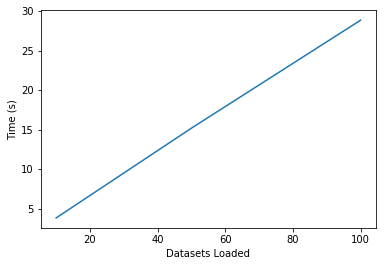

In [0]:
plt.plot([10,50,100], [	3.808,15.180,28.846])
plt.xlabel("Datasets Loaded")
plt.ylabel("Time (s)")

I ran 3 trials for 10, 50 and 100 and took the average. Interestingly, the graph is almost perfectly linear. This inplies that there is a linear speedup when you load more datasets.

### Question 8: Playing with a pre-trained model [25 points]

#### Setup code for the model
These cells do not produce any output but merely setup the results for this question.

In [0]:
from dltk.io.augmentation import *
from dltk.io.preprocessing import *

tf.logging.set_verbosity(tf.logging.ERROR)

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# Generate a simple toy dataset
im_width = 256
im_height = 256
num_imgs = 200

def create_test_image(width, height, num_objs=12, rad_max=30):
    '''Return a noisy 2D image with `num_objs' circles and a 2D mask image.'''
    image = np.zeros((width, height))

    for i in range(num_objs):
        x = np.random.randint(rad_max, width - rad_max)
        y = np.random.randint(rad_max, height - rad_max)
        rad = np.random.randint(10, rad_max)
        
        spy, spx = np.ogrid[-x:width - x, -y:height - y]
        circle = (spx * spx + spy * spy) <= rad * rad
        image[circle] = np.random.random() * 0.5 + 0.5

    norm = np.random.uniform(0, 0.25, size=image.shape)

    return np.maximum(image, norm), (image > 0).astype(np.int32)  

# Note, that the read_fn does not rely on the `file_references` in this case and 
# just ignores it. Other than that, we create a similar `read_fn` as in 
# `dltk/examples/tutorials/01_Reading_data.ipynb`:
def read_fn(file_references, mode, params=None):
    
    im, mask = create_test_image(im_width,im_height)
    
    yield {'features': {'x': im[np.newaxis, :, :, np.newaxis]},
           'labels': {'y': mask[np.newaxis]}}

In [0]:
from matplotlib import pyplot as plt
from IPython import display

class NotebookLoggingHook(tf.train.SessionRunHook):
    def __init__(self, fetches):
        self.fetches = fetches
        self.loss = []
        
    def before_run(self, run_context):
        # Add the tensors to fetch to the session
        return tf.train.SessionRunArgs(self.fetches)
    
    def after_run(self, run_context, run_values):
        # Extract the results of the fetched tensors
        fetch_dict = run_values.results
        
        # Assume to have {'loss': scalar, 'input': img, 'output': img, 'truth': img}
        self.loss.append(fetch_dict['loss'])
        
        # Plot stuff using `matplotlib`
        f, axarr = plt.subplots(2, 2, figsize=(16,8))
        axarr[0,0].imshow(np.squeeze(fetch_dict['x'][0,0,:,:,0]), cmap='gray')
        axarr[0,0].set_title('Input: x')
        axarr[0,0].axis('off')

        axarr[0,1].plot(self.loss)
        axarr[0,1].set_title('Crossentropy loss')
        axarr[0,1].set_yscale('log')
        axarr[0,1].axis('on')

        axarr[1,0].imshow(np.squeeze(fetch_dict['y_'][0,0,:,:]), cmap='gray', vmin=0, vmax=1)
        axarr[1,0].set_title('Prediction: y_')
        axarr[1,0].axis('off')

        axarr[1,1].imshow(np.squeeze(fetch_dict['y'][0,0,:,:]), cmap='gray', vmin=0, vmax=1)
        axarr[1,1].set_title('Truth: y')
        axarr[1,1].axis('off')

        display.clear_output(wait=True)
        display.display(plt.gcf())
        plt.close(f)


In [0]:
# Create a `NotebookLoggingHook`
nl_hook = NotebookLoggingHook(None)
hooks = [nl_hook]

# Create the model function with its required arguments `features`, `labels`, 
# `mode`, and `params`:
def model_fn(features, labels, mode, params):
    
    # 1. Define a model to train and its outputs. It can be any model you 
    # would like to create, however, here we import a pre-built 
    # `dltk/networks/segmentation/fcn`:
    from dltk.networks.segmentation.fcn import residual_fcn_3d
    net_output_ops = residual_fcn_3d(features['x'], 2, num_res_units=1, filters=(16, 32, 64),
                    strides=((1, 1, 1), (1, 2, 2), (1, 2, 2)), mode=mode)
    
    # 1.1 Generate predictions only (for `ModeKeys.PREDICT`)
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode=mode,
            predictions=net_output_ops,
            export_outputs={'out': tf.estimator.export.PredictOutput(net_output_ops)})
    
    # 2. Set up a loss function
    loss = tf.losses.sparse_softmax_cross_entropy(labels['y'],
                                                  net_output_ops['logits'])
    
    # 3. Define a training op and ops for updating moving averages 
    # (e.g. for batch normalisation:
    global_step = tf.train.get_global_step()
    optimiser = tf.train.AdamOptimizer(learning_rate=params["learning_rate"],
                                       epsilon=1e-5)
      
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        train_op = optimiser.minimize(loss, global_step=global_step)
    
    # 4.1 (Optional) Create custom summaries to be plotted with our
    # custom `NotebookLoggingHook`
    my_notebook_fetches = {}
    my_notebook_fetches['loss'] = loss
    my_notebook_fetches['x'] = features['x']
    my_notebook_fetches['y'] = labels['y']
    my_notebook_fetches['y_'] = net_output_ops['y_']
    nl_hook.fetches = my_notebook_fetches
    
    # 5. Return EstimatorSpec object
    return tf.estimator.EstimatorSpec(mode=mode,
                                      predictions=net_output_ops, 
                                      loss=loss,
                                      train_op=train_op,
                                      eval_metric_ops=None)

In [0]:
from dltk.io.abstract_reader import Reader

# Set up a data reader to handle the file i/o. 
reader_example_shapes = {'features': {'x': [1, im_width, im_height, 1]},
                         'labels': {'y': [1, im_width, im_height]}}

reader = Reader(read_fn, {'features': {'x': tf.float32},
                          'labels': {'y': tf.int32}})


input_fn, qinit_hook = reader.get_inputs(file_references=None,
                                         mode=tf.estimator.ModeKeys.TRAIN,
                                         example_shapes=reader_example_shapes)

#### Running the model
I run 10 trials for each step size and print the results. I record both the training and testing loss.

In [0]:
for s in [200, 250, 300, 350, 400]:
  print()
  print()
  print()
  print("Running with", s, "steps")
  print()
  training_losses = []
  testing_losses = []
  for i in range(10):
    nl_hook.loss = []
    nn = tf.estimator.Estimator(model_fn=model_fn, 
                              model_dir=None, 
                              params={"learning_rate": 0.001})
    _ = nn.train(input_fn=input_fn, hooks=hooks + [qinit_hook], steps=s)
    training_losses.append(nl_hook.loss[-1])
    nl_hook.loss = []
    eval_input_fn, eval_qinit_hook = reader.get_inputs(file_references=None, 
                                                       mode=tf.estimator.ModeKeys.EVAL,
                                                       example_shapes=reader_example_shapes)

    _ = nn.evaluate(input_fn=eval_input_fn, hooks=hooks + [eval_qinit_hook], steps=1)
    testing_losses.append(nl_hook.loss[-1])
  print("Training Losses")
  print(training_losses)
  print()
  print("Testing Losses")
  print(testing_losses)
  print()
  print(sum(training_losses)/len(training_losses))
  print(sum(testing_losses)/len(testing_losses))

Running 10 trials for each step size takes a while, so I stored the data from one of my runs below, so that I didn't have to rerun the function every time.

In [0]:
training_data = pd.DataFrame({
    '200 steps':[0.00031968503, 0.004053446, 0.0018036657, 0.0013784298, 0.002724114, 0.0010445745, 0.0014704936, 0.0011307569, 0.0046829944, 0.0009358322], 
    '250 steps':[0.0043987054, 0.0020846939, 0.0004880182, 0.002267276, 0.0055029583, 0.0016827547, 0.0040613897, 0.0006082422, 0.0005245382, 0.0003608989],
    '300 steps':[0.003622267, 0.0045576245, 0.0017052011, 0.00074253057, 0.0014077409, 0.0034384383, 0.0008884283, 0.0013283917, 0.0033529247, 0.0029730177],
    '350 steps':[0.0005155058, 0.0018379062, 0.00075732707, 0.0015904624, 0.0011037993, 0.0003189794, 0.0011636552, 0.002508474, 0.0010988379, 0.0008470398],
    '400 steps':[0.0018810875, 0.0008117666, 0.0023688981, 0.0008329282, 0.0012870032, 0.000288028, 0.0007505297, 0.0018577789, 0.00070143095, 0.001310938]})
testing_data = pd.DataFrame({
    '200 steps':[0.045563467, 0.08310962, 1.7827661, 0.25349998, 0.013529351, 0.15280698, 0.31465536, 0.0486148, 0.6601817, 0.016194455], 
    '250 steps':[0.08968644, 0.05265791, 0.034784026, 0.057290655, 0.053981327, 0.013429325, 0.10312419, 0.019845929, 0.018292129, 0.011549329],
    '300 steps':[0.06830813, 0.030611996, 0.018784259, 0.014779697, 0.05285634, 0.014814243, 0.012131959, 0.17233905, 0.048307195, 0.018496813],
    '350 steps':[0.0133934785, 0.008134412, 0.02091653, 0.013738919, 0.008495469, 0.007940449, 0.03537734, 0.006052834, 0.022430114, 0.007563476],
    '400 steps':[0.0008117666, 0.0023688981, 0.0008329282, 0.0012870032, 0.000288028, 0.0007505297, 0.0018577789, 0.00070143095, 0.001310938, 0.008531649]})

In [0]:
print("Training Data Loss for 10 Trials")
print(training_data)
print()
print("Statistics for Training Data Loss for 10 Trials")
print(training_data.describe().loc[["mean","50%"]])
print()
print("Testing Data Loss for 10 Trials")
print(testing_data)
print()
print("Statistics for Training Data Loss for 10 Trials")
print(testing_data.describe().loc[["mean","50%"]])

Training Data Loss for 10 Trials
   200 steps  250 steps  300 steps  350 steps  400 steps
0   0.000320   0.004399   0.003622   0.000516   0.001881
1   0.004053   0.002085   0.004558   0.001838   0.000812
2   0.001804   0.000488   0.001705   0.000757   0.002369
3   0.001378   0.002267   0.000743   0.001590   0.000833
4   0.002724   0.005503   0.001408   0.001104   0.001287
5   0.001045   0.001683   0.003438   0.000319   0.000288
6   0.001470   0.004061   0.000888   0.001164   0.000751
7   0.001131   0.000608   0.001328   0.002508   0.001858
8   0.004683   0.000525   0.003353   0.001099   0.000701
9   0.000936   0.000361   0.002973   0.000847   0.001311

Statistics for Training Data Loss for 10 Trials
      200 steps  250 steps  300 steps  350 steps  400 steps
mean   0.001954   0.002198   0.002402   0.001174   0.001209
50%    0.001424   0.001884   0.002339   0.001101   0.001060

Testing Data Loss for 10 Trials
   200 steps  250 steps  300 steps  350 steps  400 steps
0   0.045563   0.0896

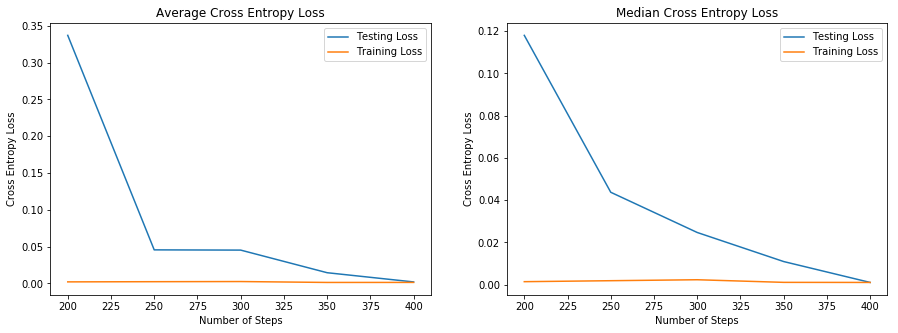

In [0]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) 
plt.title('Average Cross Entropy Loss')
plt.xlabel('Number of Steps')
plt.ylabel('Cross Entropy Loss')
plt.plot([200,250,300,350,400], testing_data.mean(), label="Testing Loss")
plt.plot([200,250,300,350,400], training_data.mean(), label="Training Loss")
plt.legend()
plt.subplot(1, 2, 2) 
plt.title('Median Cross Entropy Loss')
plt.xlabel('Number of Steps')
plt.ylabel('Cross Entropy Loss')
plt.plot([200,250,300,350,400], testing_data.median(), label="Testing Loss")
plt.plot([200,250,300,350,400], training_data.median(), label="Training Loss")
plt.legend()
plt.show()


It is clear from the graphs, that the training loss converges before 200 steps, but the testing loss continues to decrease as the number of steps increases past 200. The decrease in loss also decreases as the number of steps increases. At 400 steps, it appears that the testing loss starts to converge as it reaches the same loss as the training loss. Thus, running more steps takes longer, but produces a more accurate model that represents a better generalization of the data.